🔍 ANÁLISE ESTRUTURAL DO GRAFO

1. COMPONENTES CONECTADOS:
Número de componentes conectados: 756
Tamanho do maior componente: 3781
Percentual do grafo no maior componente: 82.6%
Top 5 tamanhos de componentes: [3781, 4, 3, 3, 3]

2. ANÁLISE DE CENTRALIDADE:
Top 5 nós por grau de centralidade:
  Node u4sTiCzVeIHZY8OlaL346Q: 0.0507
  Node gldPX9ANF5Nic0N7igu2og: 0.0490
  Node dLc1d1zwd1Teu2QED5TmlA: 0.0463
  Node woXlprCuowrLJswWere3TQ: 0.0446
  Node Voeq7aGDmCGMjE_SQiHwRA: 0.0418
Top 5 nós por betweenness centrality:
  Node u4sTiCzVeIHZY8OlaL346Q: 0.0375
  Node gldPX9ANF5Nic0N7igu2og: 0.0318
  Node dLc1d1zwd1Teu2QED5TmlA: 0.0313
  Node woXlprCuowrLJswWere3TQ: 0.0310
  Node Voeq7aGDmCGMjE_SQiHwRA: 0.0270

3. ANÁLISE POR CATEGORIAS:
Top 10 categorias por número de estabelecimentos:
                  stars_count  stars_mean  reviewCount_mean  degree_mean
primary_category                                                        
1                         485       3.520            77.037       

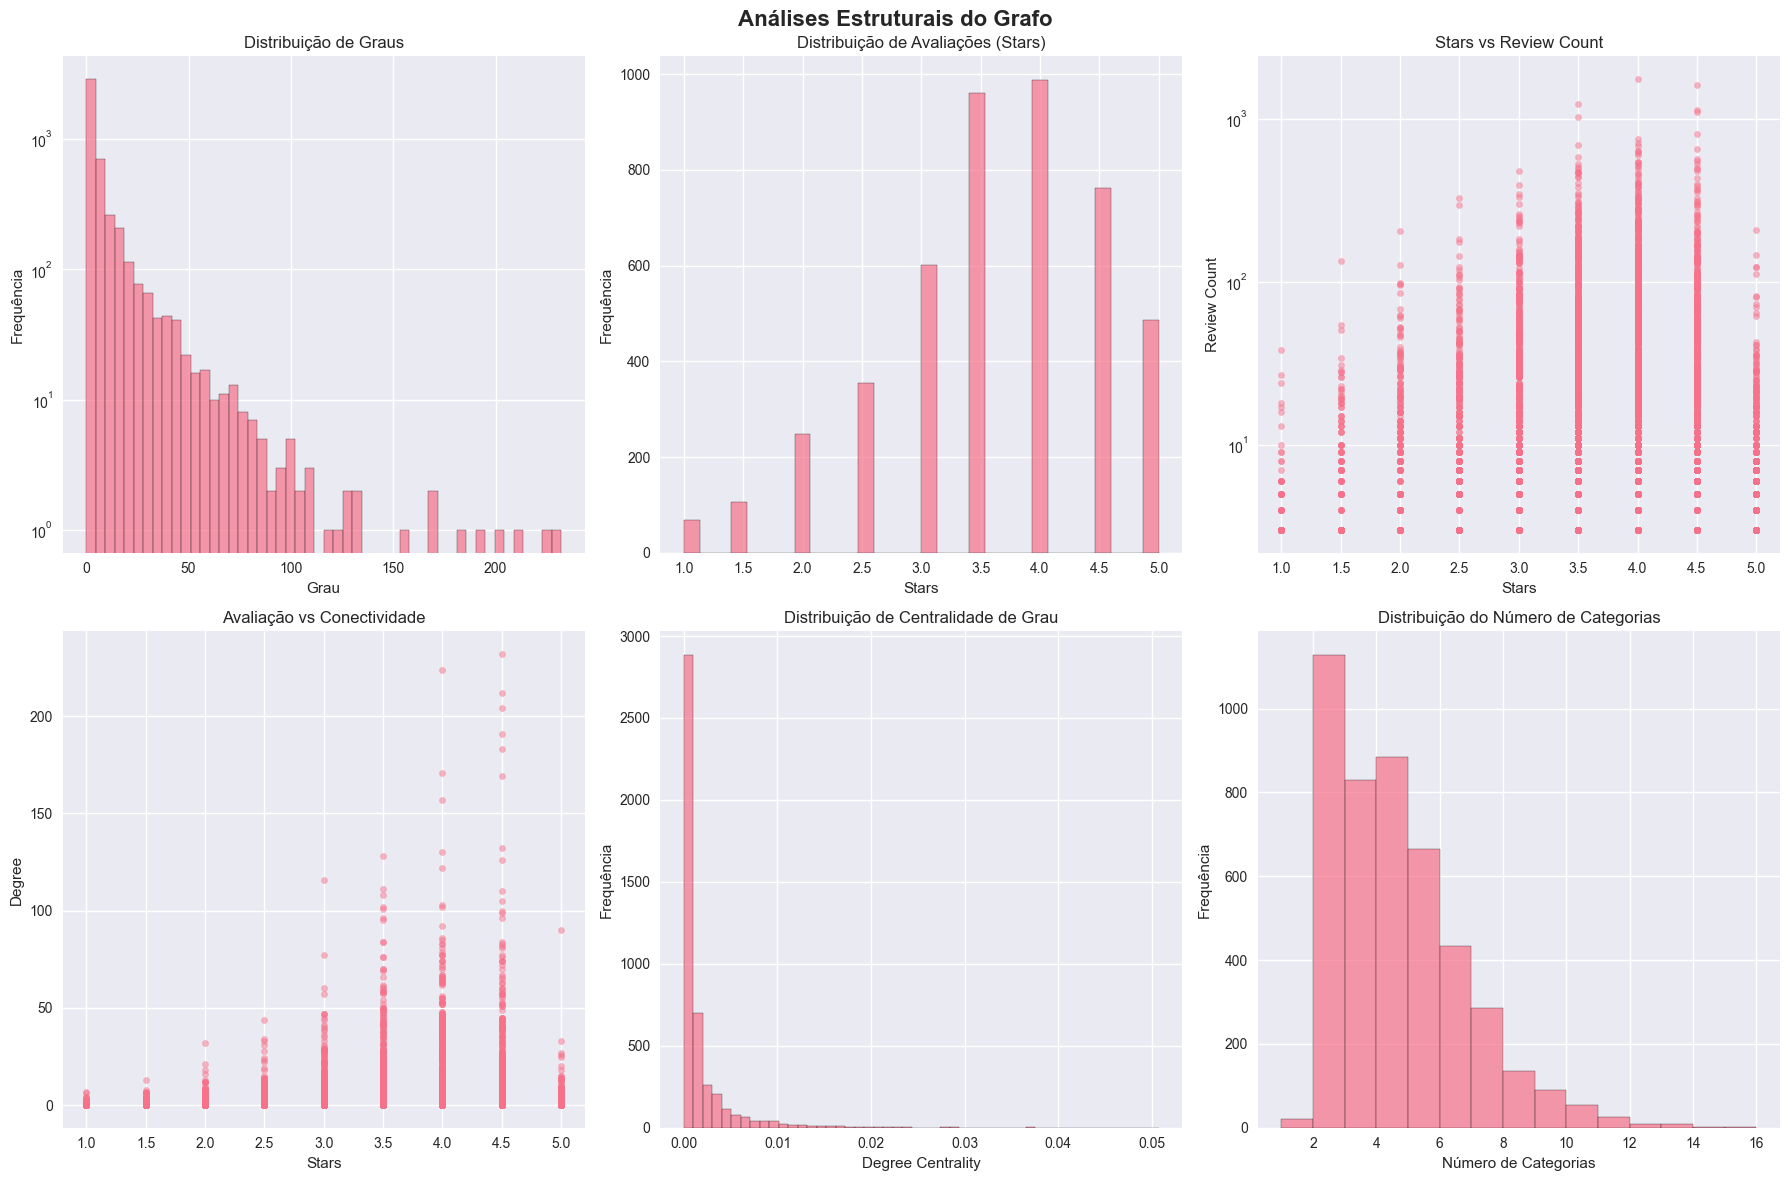


4. ANÁLISE DE CLUSTERING:
Características dos clusters:
        stars        reviewCount   degree num_categories
        count   mean        mean     mean           mean
cluster                                                 
0         812  3.854      30.670    5.926          7.362
1         345  3.877     201.484   40.983          5.061
2        2213  4.133      24.880    4.889          3.262
3          39  4.013     619.974  117.359          5.821
4        1166  2.419      17.764    3.117          3.454


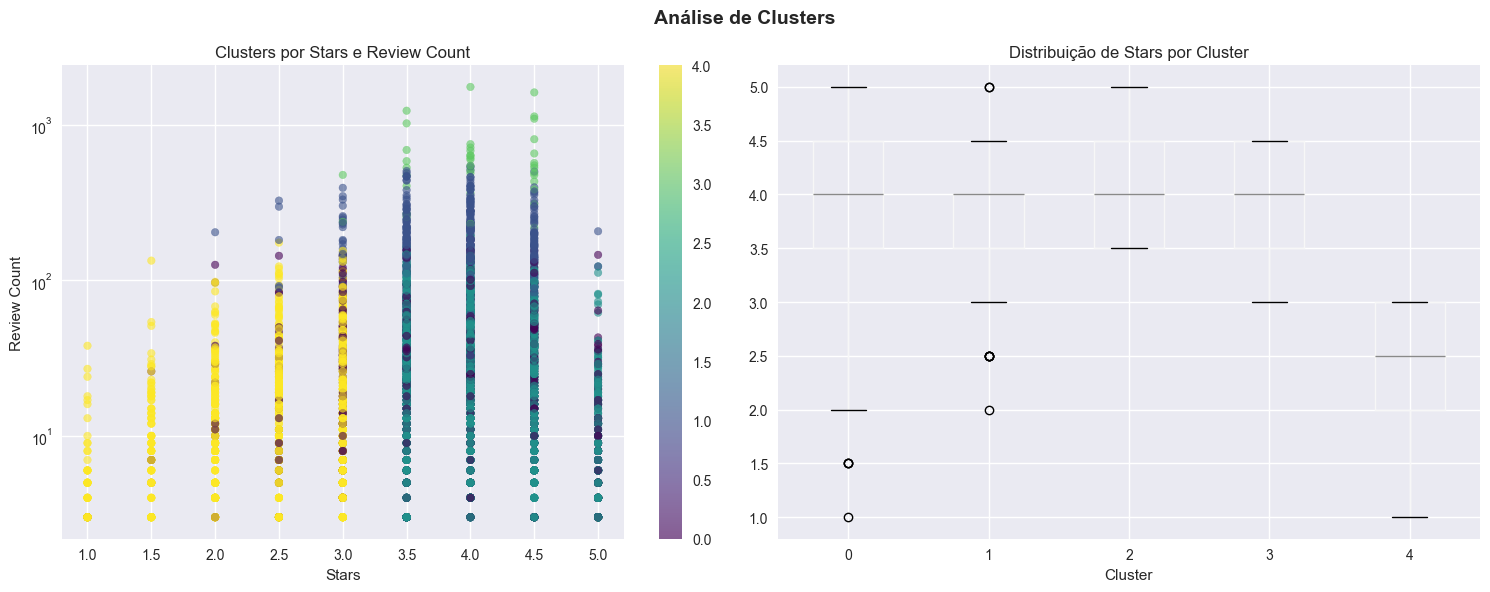


5. ANÁLISE DE ASSORTATIVIDADE:
Coeficiente de assortatividade por grau: 0.0447
Assortatividade por categoria: 0.0179

6. PROPRIEDADES DE SMALL WORLD:
Comprimento médio do caminho (maior componente): 3.699
Coeficiente de clustering médio: 0.0449
Coeficiente Small World (σ): 26.626
Valores σ > 1 indicam propriedades de small world

7. ANÁLISE DE DENSIDADE:
Densidade global do grafo: 0.001815
Densidade para '1': 0.007114
Densidade para '641': 0.003333
Densidade para '327': 0.000360
Densidade para '280': 0.002504
Densidade para '82': 0.004605

8. ANÁLISE DE HUBS E AUTORIDADES:
Top 5 Hubs:
  Node woXlprCuowrLJswWere3TQ: 0.0172 | Stars: 4.5 | Category: 1
  Node u4sTiCzVeIHZY8OlaL346Q: 0.0158 | Stars: 4.5 | Category: 221
  Node Voeq7aGDmCGMjE_SQiHwRA: 0.0137 | Stars: 4.5 | Category: 58
  Node JLbgvGM4FXh9zNP4O5ZWjQ: 0.0136 | Stars: 4.0 | Category: 428
  Node gldPX9ANF5Nic0N7igu2og: 0.0106 | Stars: 4.0 | Category: 1
Top 5 Authorities:
  Node woXlprCuowrLJswWere3TQ: 0.0172 | Stars: 4.5 | Categ

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Carregar o grafo
G = nx.read_gml("GraphMissingEdges.gml")

# Configurar estilo dos plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🔍 ANÁLISE ESTRUTURAL DO GRAFO")
print("=" * 50)

# 1. ANÁLISE DE COMPONENTES CONECTADOS
print("\n1. COMPONENTES CONECTADOS:")
num_components = nx.number_connected_components(G)
largest_cc = max(nx.connected_components(G), key=len)
print(f"Número de componentes conectados: {num_components}")
print(f"Tamanho do maior componente: {len(largest_cc)}")
print(f"Percentual do grafo no maior componente: {len(largest_cc)/len(G.nodes)*100:.1f}%")

# Tamanhos dos componentes
component_sizes = [len(c) for c in nx.connected_components(G)]
component_sizes.sort(reverse=True)
print(f"Top 5 tamanhos de componentes: {component_sizes[:5]}")

# 2. MÉTRICAS DE CENTRALIDADE
print("\n2. ANÁLISE DE CENTRALIDADE:")
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, k=1000)  # Sample para grafos grandes
closeness_centrality = nx.closeness_centrality(G)

# Nós mais centrais
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 nós por grau de centralidade:")
for node, cent in top_degree:
    print(f"  Node {node}: {cent:.4f}")

print("Top 5 nós por betweenness centrality:")
for node, cent in top_betweenness:
    print(f"  Node {node}: {cent:.4f}")

# 3. PREPARAR DATAFRAME PARA ANÁLISES
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient="index")
df_nodes["degree"] = [G.degree(n) for n in G.nodes()]
df_nodes["degree_centrality"] = [degree_centrality[n] for n in G.nodes()]
df_nodes["betweenness_centrality"] = [betweenness_centrality[n] for n in G.nodes()]
df_nodes["closeness_centrality"] = [closeness_centrality[n] for n in G.nodes()]

# Converter colunas numéricas
df_nodes["stars"] = pd.to_numeric(df_nodes["stars"], errors="coerce")
df_nodes["reviewCount"] = pd.to_numeric(df_nodes["reviewCount"], errors="coerce")

# Processar categorias
df_nodes["num_categories"] = df_nodes["categories"].apply(lambda x: len([c.strip() for c in x.split(",") if c.strip()]))
df_nodes["primary_category"] = df_nodes["categories"].apply(lambda x: x.split(",")[0].strip() if x.strip() else "Unknown")

# 4. ANÁLISE POR CATEGORIAS
print("\n3. ANÁLISE POR CATEGORIAS:")
category_stats = df_nodes.groupby("primary_category").agg({
    'stars': ['count', 'mean', 'std'],
    'reviewCount': ['mean', 'std'],
    'degree': ['mean', 'std'],
    'degree_centrality': 'mean'
}).round(3)

category_stats.columns = ['_'.join(col).strip() for col in category_stats.columns]
category_stats = category_stats.sort_values('stars_count', ascending=False)

print("Top 10 categorias por número de estabelecimentos:")
print(category_stats.head(10)[['stars_count', 'stars_mean', 'reviewCount_mean', 'degree_mean']])

# 5. VISUALIZAÇÕES
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análises Estruturais do Grafo', fontsize=16, fontweight='bold')

# 5.1 Distribuição de Graus (log-scale)
axes[0,0].hist(df_nodes["degree"], bins=50, alpha=0.7, edgecolor='black')
axes[0,0].set_xlabel('Grau')
axes[0,0].set_ylabel('Frequência')
axes[0,0].set_title('Distribuição de Graus')
axes[0,0].set_yscale('log')

# 5.2 Distribuição de Stars
axes[0,1].hist(df_nodes["stars"].dropna(), bins=30, alpha=0.7, edgecolor='black')
axes[0,1].set_xlabel('Stars')
axes[0,1].set_ylabel('Frequência')
axes[0,1].set_title('Distribuição de Avaliações (Stars)')

# 5.3 Review Count vs Stars
valid_data = df_nodes.dropna(subset=['stars', 'reviewCount'])
axes[0,2].scatter(valid_data["stars"], valid_data["reviewCount"], alpha=0.5, s=20)
axes[0,2].set_xlabel('Stars')
axes[0,2].set_ylabel('Review Count')
axes[0,2].set_title('Stars vs Review Count')
axes[0,2].set_yscale('log')

# 5.4 Degree vs Stars
axes[1,0].scatter(valid_data["stars"], valid_data["degree"], alpha=0.5, s=20)
axes[1,0].set_xlabel('Stars')
axes[1,0].set_ylabel('Degree')
axes[1,0].set_title('Avaliação vs Conectividade')

# 5.5 Centralidade de Grau
axes[1,1].hist(df_nodes["degree_centrality"], bins=50, alpha=0.7, edgecolor='black')
axes[1,1].set_xlabel('Degree Centrality')
axes[1,1].set_ylabel('Frequência')
axes[1,1].set_title('Distribuição de Centralidade de Grau')

# 5.6 Número de Categorias
axes[1,2].hist(df_nodes["num_categories"], bins=range(1, df_nodes["num_categories"].max()+2), 
               alpha=0.7, edgecolor='black')
axes[1,2].set_xlabel('Número de Categorias')
axes[1,2].set_ylabel('Frequência')
axes[1,2].set_title('Distribuição do Número de Categorias')

plt.tight_layout()
plt.show()

# 6. ANÁLISE DE CLUSTERS POR CARACTERÍSTICAS
print("\n4. ANÁLISE DE CLUSTERING:")

# Preparar dados para clustering
cluster_features = ['stars', 'reviewCount', 'degree', 'num_categories']
cluster_data = df_nodes[cluster_features].dropna()

# Normalizar dados
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)
cluster_data['cluster'] = cluster_labels

# Análise dos clusters
cluster_analysis = cluster_data.groupby('cluster').agg({
    'stars': ['count', 'mean'],
    'reviewCount': 'mean',
    'degree': 'mean',
    'num_categories': 'mean'
}).round(3)

print("Características dos clusters:")
print(cluster_analysis)

# 7. VISUALIZAÇÃO DOS CLUSTERS
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot dos clusters
scatter = axes[0].scatter(cluster_data['stars'], cluster_data['reviewCount'], 
                         c=cluster_data['cluster'], cmap='viridis', alpha=0.6, s=30)
axes[0].set_xlabel('Stars')
axes[0].set_ylabel('Review Count')
axes[0].set_title('Clusters por Stars e Review Count')
axes[0].set_yscale('log')
plt.colorbar(scatter, ax=axes[0])

# Box plot de stars por cluster
cluster_data.boxplot(column='stars', by='cluster', ax=axes[1])
axes[1].set_title('Distribuição de Stars por Cluster')
axes[1].set_xlabel('Cluster')

plt.suptitle('Análise de Clusters', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 8. ANÁLISE DE ASSORTATIVIDADE
print("\n5. ANÁLISE DE ASSORTATIVIDADE:")

# Assortatividade por grau
degree_assortativity = nx.degree_assortativity_coefficient(G)
print(f"Coeficiente de assortatividade por grau: {degree_assortativity:.4f}")

# Assortatividade por atributos categóricos
try:
    # Para categorias (usando primary_category)
    node_categories = {node: data["primary_category"] for node, data in df_nodes.iterrows()}
    nx.set_node_attributes(G, node_categories, "primary_category")
    category_assortativity = nx.attribute_assortativity_coefficient(G, "primary_category")
    print(f"Assortatividade por categoria: {category_assortativity:.4f}")
except:
    print("Não foi possível calcular assortatividade por categoria")

# 9. ANÁLISE DE SMALL WORLD
print("\n6. PROPRIEDADES DE SMALL WORLD:")
if nx.is_connected(G):
    avg_path_length = nx.average_shortest_path_length(G)
    print(f"Comprimento médio do caminho: {avg_path_length:.3f}")
else:
    # Para o maior componente conectado
    largest_cc_subgraph = G.subgraph(largest_cc)
    avg_path_length = nx.average_shortest_path_length(largest_cc_subgraph)
    print(f"Comprimento médio do caminho (maior componente): {avg_path_length:.3f}")

avg_clustering = nx.average_clustering(G)
print(f"Coeficiente de clustering médio: {avg_clustering:.4f}")

# Small-world coefficient (aproximação)
# Comparar com grafo aleatório equivalente
n = len(G.nodes())
m = len(G.edges())
avg_degree = 2 * m / n

# Clustering esperado em grafo aleatório
random_clustering = avg_degree / (n - 1)
# Path length esperado em grafo aleatório  
random_path_length = np.log(n) / np.log(avg_degree)

small_world_coeff = (avg_clustering / random_clustering) / (avg_path_length / random_path_length)
print(f"Coeficiente Small World (σ): {small_world_coeff:.3f}")
print("Valores σ > 1 indicam propriedades de small world")

# 10. ANÁLISE DE DENSIDADE POR REGIÃO/CATEGORIA
print("\n7. ANÁLISE DE DENSIDADE:")
overall_density = nx.density(G)
print(f"Densidade global do grafo: {overall_density:.6f}")

# Densidade por categoria principal (top 5)
top_categories = df_nodes['primary_category'].value_counts().head(5).index

for category in top_categories:
    cat_nodes = df_nodes[df_nodes['primary_category'] == category].index
    subgraph = G.subgraph(cat_nodes)
    if len(subgraph.nodes()) > 1:
        density = nx.density(subgraph)
        print(f"Densidade para '{category}': {density:.6f}")

# 11. IDENTIFICAÇÃO DE HUBS E AUTORIDADES
print("\n8. ANÁLISE DE HUBS E AUTORIDADES:")
hubs, authorities = nx.hits(G, max_iter=100)

# Top hubs e autoridades
top_hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)[:5]
top_authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Hubs:")
for node, score in top_hubs:
    node_info = df_nodes.loc[node]
    print(f"  Node {node}: {score:.4f} | Stars: {node_info['stars']:.1f} | Category: {node_info['primary_category']}")

print("Top 5 Authorities:")
for node, score in top_authorities:
    node_info = df_nodes.loc[node]
    print(f"  Node {node}: {score:.4f} | Stars: {node_info['stars']:.1f} | Category: {node_info['primary_category']}")

print("\n" + "="*80)
print("🎯 RESUMO EXECUTIVO:")
print("="*80)
print(f"• Grafo com {len(G.nodes())} nós e {len(G.edges())} arestas")
print(f"• {num_components} componentes, maior com {len(largest_cc)/len(G.nodes)*100:.1f}% dos nós")
print(f"• Densidade: {overall_density:.6f} (grafo esparso)")
print(f"• Clustering médio: {avg_clustering:.4f}")
print(f"• Coeficiente Small World: {small_world_coeff:.3f}")
print(f"• Assortatividade por grau: {degree_assortativity:.4f}")
print(f"• {len(df_nodes['primary_category'].unique())} categorias principais identificadas")
print("="*80)